# The following notebook has been developed to study logistic regression algorithm. Here the wine quality is classified into two classes by applying logistic regression. 

### The code given below shows the plot of a sigmoid function. The sigmoid function is also called the squashing function as it squashes the value of any function within the range [-1 1]. In logisitic regression we deal with probaility values for estimation of the classes and here sigmoid function is very useful for the task.

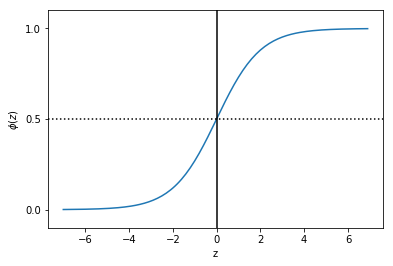

In [9]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
     return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

### The wine quality dataset is imported and two classes are created for the attribute "Quality". Here class 1 is wine quality > 5 and the class 2 is wine quality < 5.

In [76]:
from sklearn import datasets
import pandas as pd
import numpy as np
df = pd.read_csv('/home/shriansh/Downloads/winequality_red.csv', header=None)
y = df.iloc[1:500, 11].values
y = np.where(y >='6', -1, 1)
print(y)
X = df.iloc[1:500, [0,10]].values

[ 1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1
  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1
  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1
 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1
 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1
 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1
 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1
 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1
 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1  1 -1

### sklearn library is imported for splitting the dataset into training and testing. The train-test split function here puts 70 % of data in training and remaining 30% in testing.

In [77]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Standard scaler is imported for tranforming the parameters in such a manner that no attribute has a dominating factor associated with it. It is done for unbiased tree formation without any issues related with the attributes.

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


/home/shriansh/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Matlotlib library is called and the plotting function is generated below. The resolution, size min range, max range, limits etc is specified.

In [79]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        # highlight test samples
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',

                        alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

### The main part of the notebook where the Logistic regression module of the sklearn in imported for performing logistic regression on the wine quality dataset.

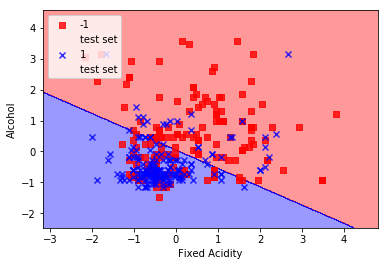

Accuracy on training set: 0.473
Accuracy on test set: 0.520


In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_train_std,y_train, classifier=lr,test_idx=range(50,150))
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.legend(loc='upper left')
plt.show()
print("Accuracy on training set: {:.3f}".format(lr.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test,y_test)))

In [81]:
lr.predict_proba(X_test_std[0,:])

/home/shriansh/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.29118735,  0.70881265]])